In [1]:
from boututils.datafile import DataFile
from boutdata.collect import collect
from boutdata.data import BoutData
import os, sys
import matplotlib
# matplotlib.use('Qt5Agg',force=True)
# matplotlib.use("TKAgg",force=True)
# matplotlib.use("widget",force=True)
import matplotlib.pyplot as plt
import xbout
import pandas as pd
import numpy as np
import pickle as pkl
import xarray as xr

from boutdata.restart import addvar
import glob
import shutil

import scipy

sys.path.append(r"/ssd_scratch/scripts/sdtools")


from hermes3.case_db import *
from hermes3.load import *
from hermes3.named_selections import *
from hermes3.plotting import *
from hermes3.grid_fields import *
from hermes3.accessors import *
from hermes3.utils import *
# from code_comparison.code_comparison import *


%load_ext autoreload
%autoreload 2

# IO

In [2]:
casestore = dict()

In [3]:
db = CaseDB(
    case_dir = r"/ssd_scratch/hcases",
    grid_dir = r"/ssd_scratch/hcases"
    )

toload = [
    dict(name="base", id="pir1-lores_base", unnormalise_geom = True),  
    dict(name="P_1e-2_I_1e-3", id="pir2-step_base", unnormalise_geom = True),  
    dict(name="P_1e-2_I_0", id="pir3-P_1e-2_I_0", unnormalise_geom = True), 
    dict(name="P_1e+0_I_0", id="pir3-P_1e0_I_0", unnormalise_geom = True), 
    dict(name="P_1e+2_I_0", id="pir3-P_1e2_I_0", unnormalise_geom = True), 
    dict(name="P_1e+2_I_0_scratch", id="pir3b-P_1e2_I_0_scratch", unnormalise_geom = True), 
    dict(name="P_1e-2_I_1e-3_scratch", id = "pir3c-P_1e-2_I_1e-3_scratch", unnormalise_geom = True)
    # dict(name="P_1e+4_I_0", id="pir3g-tune_P1e+4_I0", unnormalise_geom = True), 
]

for case in toload:
    casestore[case["name"]] = Load.case_1D(db.casepaths[case["id"]])


(0.01, 0.015)

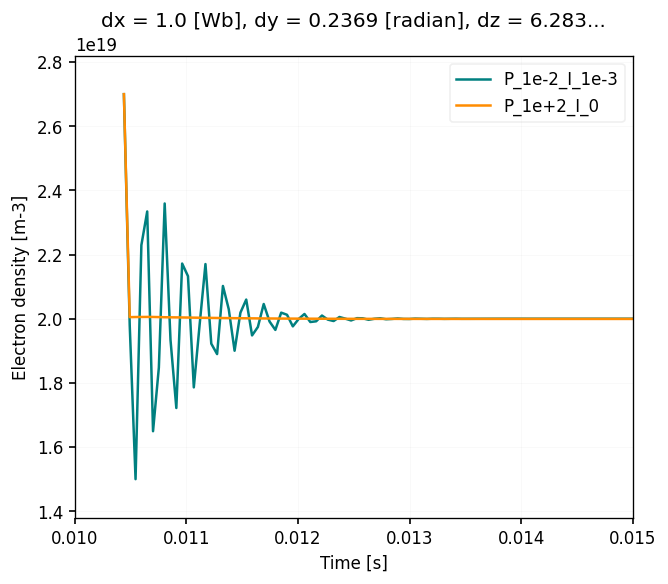

In [5]:
fig, ax = plt.subplots()

cases = casestore
cases = ["P_1e-2_I_1e-3", "P_1e+2_I_0"]
for case in cases:

    ds = casestore[case].ds.isel(pos=slice(2,-2))
    # ds.isel(t=-1)["Ne"].plot()

    alpha = 1
    lw = 2
    ls = "--"
    
    # ds["density_feedback_src_p_d+"].plot(ax = ax,  ls = ls, lw = lw, alpha = alpha, label = case)

    (ds["Ne"]).isel(pos=0).plot(ax = ax, label = case)
    # ax.plot(ds["t"], np.ones_like(ds["t"])*2.7e19, c = "k", ls = "--")

    # ax2 = ax.twinx()
    
    # ds["density_feedback_src_p_d+"].plot(ax = ax2, c = "red", ls = ls, lw = lw, alpha = alpha)
    # ds["density_feedback_src_i_d+"].plot(ax = ax2, c = "blue", ls = ls, lw = lw, alpha = alpha)
    # ax.set_title(case)
    # ax2.set_title("")
    # ax2.set_yscale("symlog", linthresh = 0.001)
    
ax.legend()
ax.set_xlim(0.01,0.015)

In [5]:
sel = "P_1e-2_I_1e-3"

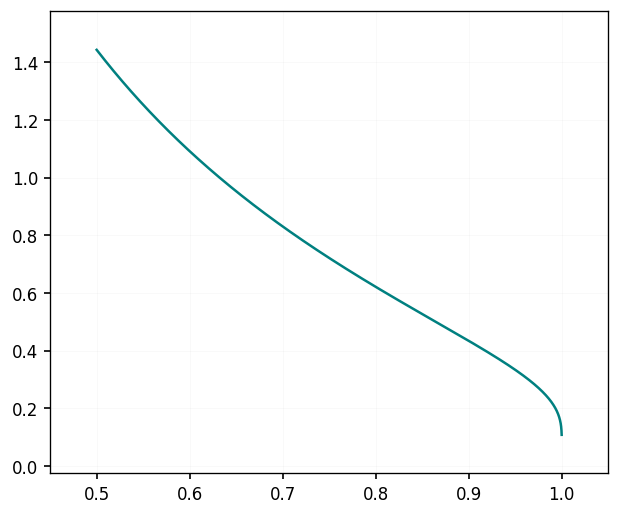

In [24]:
fig, ax = plt.subplots()

x = np.linspace(0.5, 0.9999, 5000)
y = 1/np.log(1+x/(1-x))
ax.plot(x,y)

Text(0, 0.5, 'Recycle fraction output')

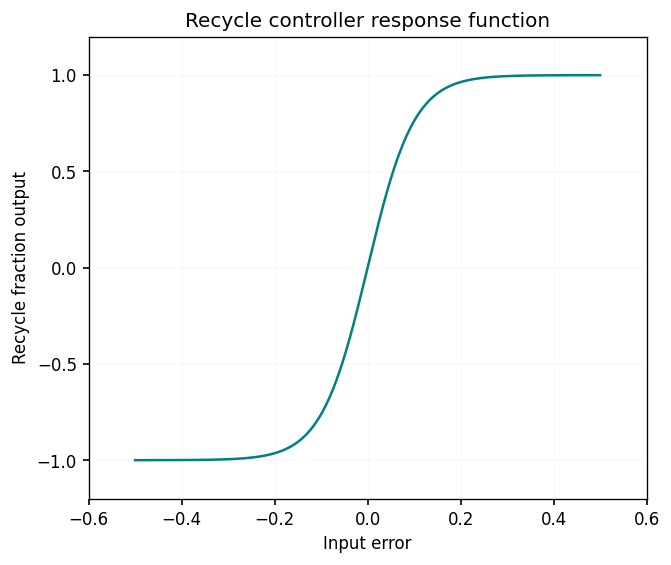

In [31]:
fig, ax = plt.subplots()

# x = np.linspace(0.5, 0.9999, 5000)
# y = np.log(x/(1-x))

x = np.linspace(-0.5,0.5,1000)

start_rec = 0.99

K = 1   # Right asymptote
A = -1 # Left asymptote
B = 20
x0 = 0
y = A+(K-A) / (1 + np.exp((-B*(x-x0))))

ax.set_title("Recycle controller response function")
ax.plot(x,y)
ax.set_xlabel("Input error")
ax.set_ylabel("Recycle fraction output")

Text(0, 0.5, 'New recycle fraction')

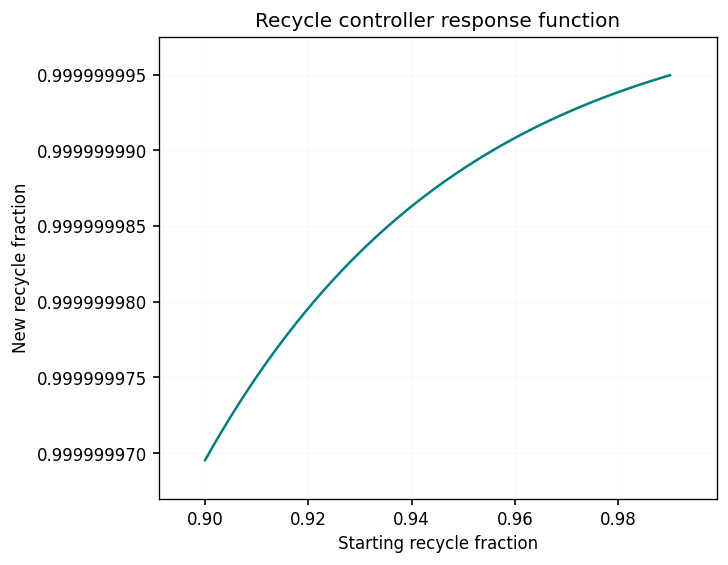

In [32]:
fig, ax = plt.subplots()

# x = np.linspace(0.5, 0.9999, 5000)
# y = np.log(x/(1-x))

x = np.linspace(0.90, 0.99,1000)

n0 = 1e19
ntarget = 2e19
upper_bound = 0.999
lower_bound = 0.5

error = (n0-ntarget)/ntarget


start_rec = 0.99

K = 1   # Right asymptote
A = -1 # Left asymptote
B = 20
x0 = 0
y = A+(K-A) / (1 + np.exp((-B*(x-x0))))

ax.set_title("Recycle controller response function")
ax.plot(x,y)
ax.set_xlabel("Starting recycle fraction")
ax.set_ylabel("New recycle fraction")

In [34]:
error

-0.5

NameError: name 'times' is not defined

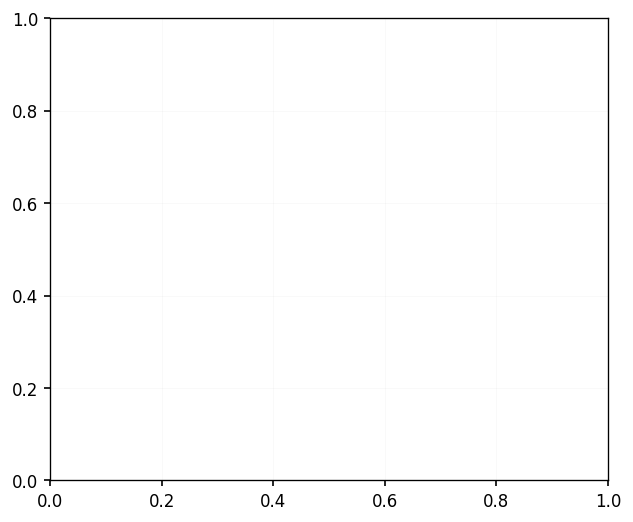

In [6]:
fig, ax = plt.subplots( dpi = 120)

ds = casestore[sel].ds.isel(pos=slice(2,-2))

# time_idx = [1,2]
time_idx = np.arange(0, len(ds["t"]), 10)

colors = make_cmap("plasma", len(times))[::-1]

for i, t in enumerate(time_idx):
    ds["Ne"].isel(t=t).plot(ax = ax, c = colors[i], alpha = 0.5, lw = 1)

ax.grid()


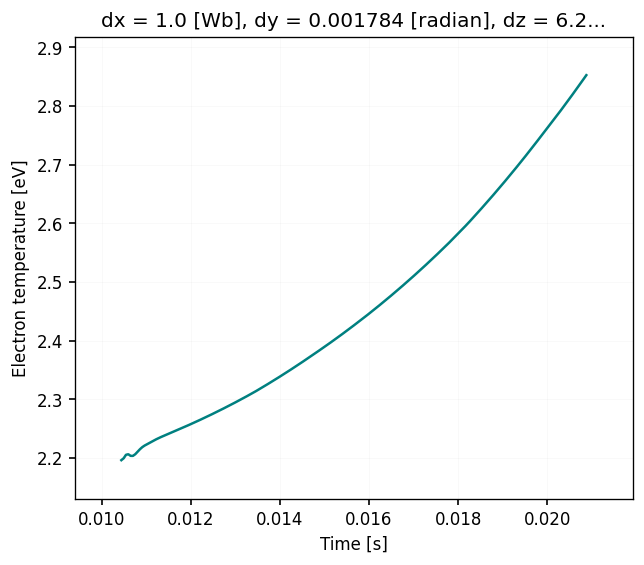

In [7]:
fig, ax = plt.subplots()
ds = casestore[sel].ds.isel(pos=slice(2,-2))
ds.isel(pos=-1)["Te"].plot(ax=ax)

In [29]:
%matplotlib widget

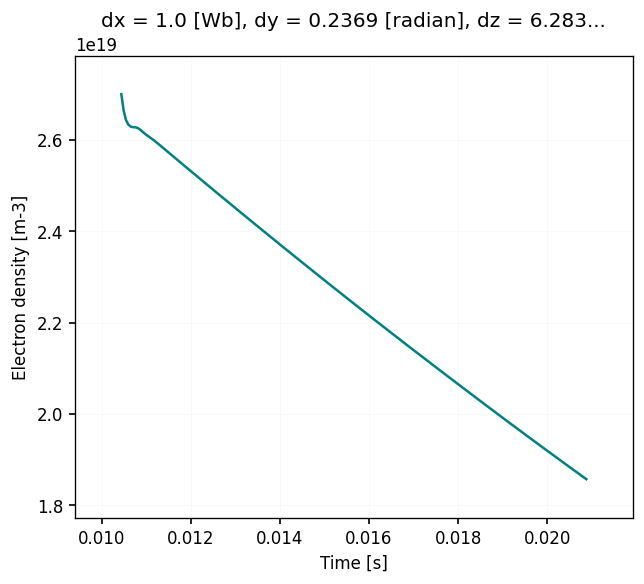

In [8]:
fig, ax = plt.subplots()
ds = casestore[sel].ds.isel(pos=slice(2,-2))
ds.isel(pos=0)["Ne"].plot(ax=ax)

In [17]:
# %matplotlib widget
%matplotlib inline

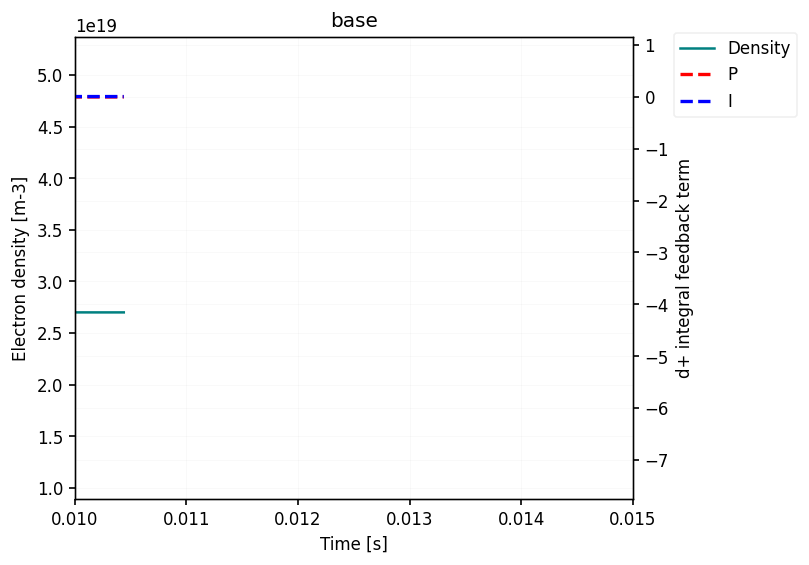

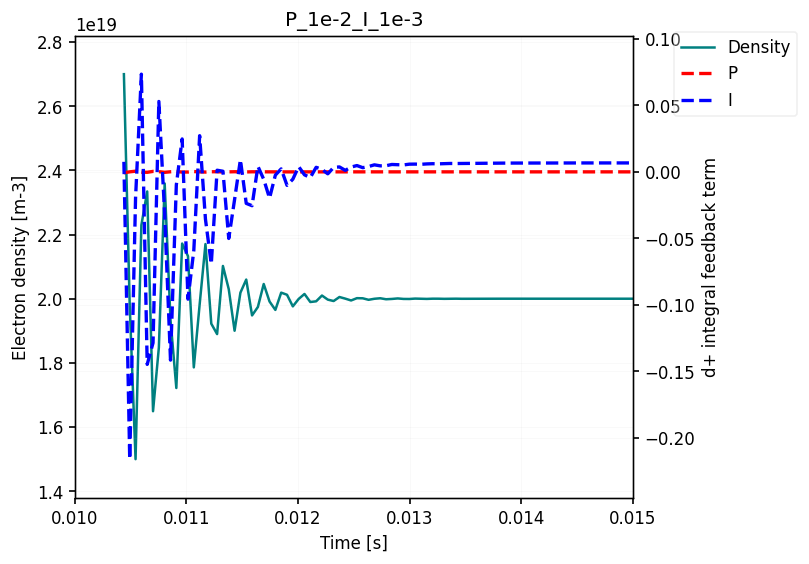

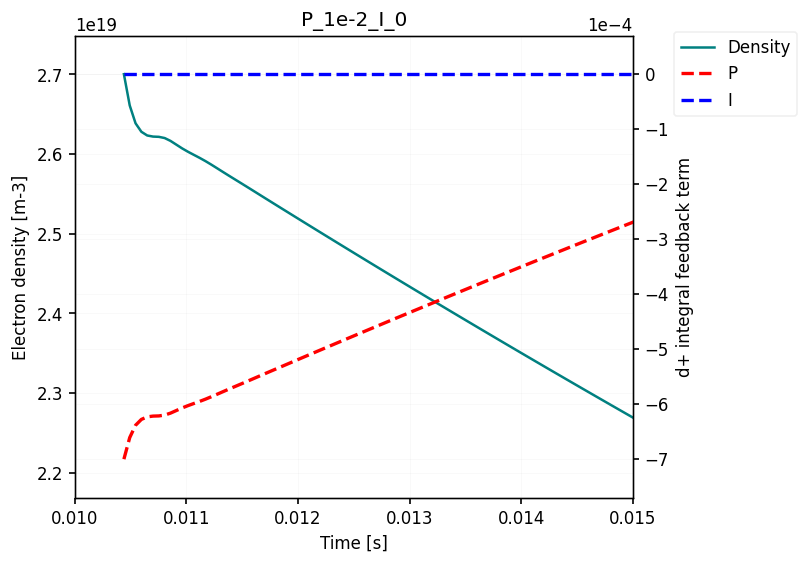

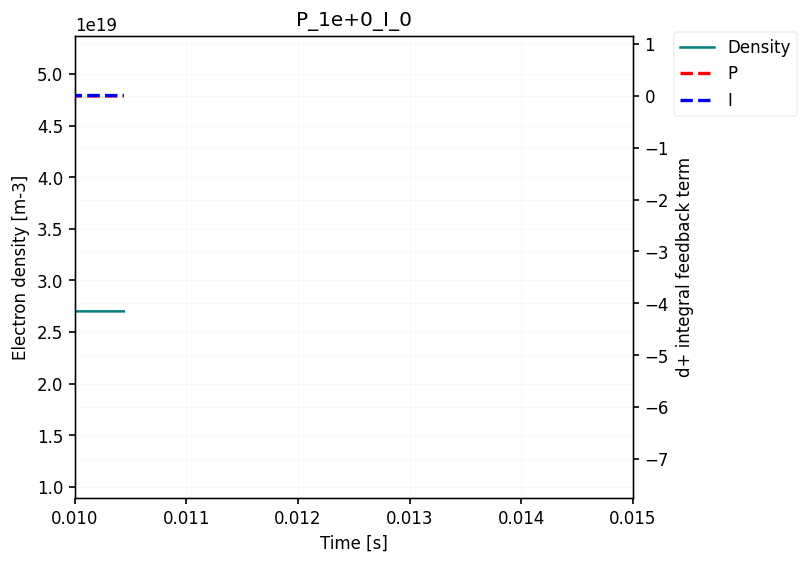

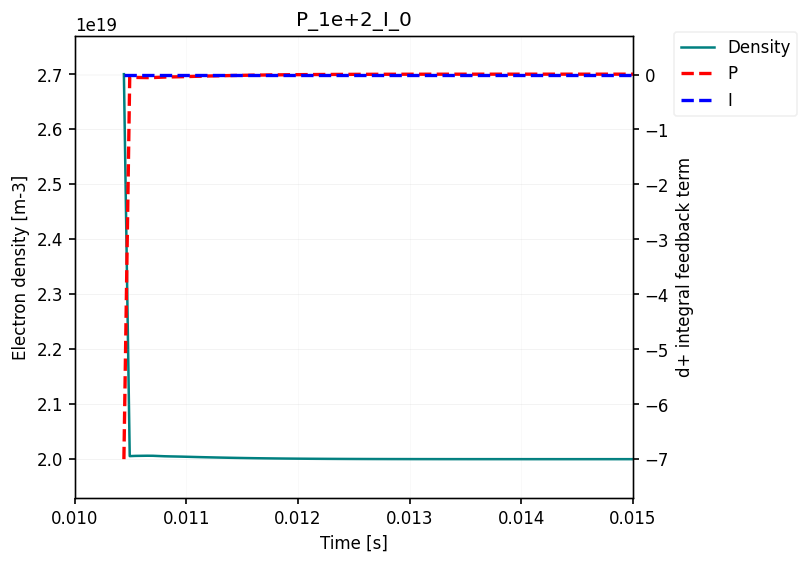

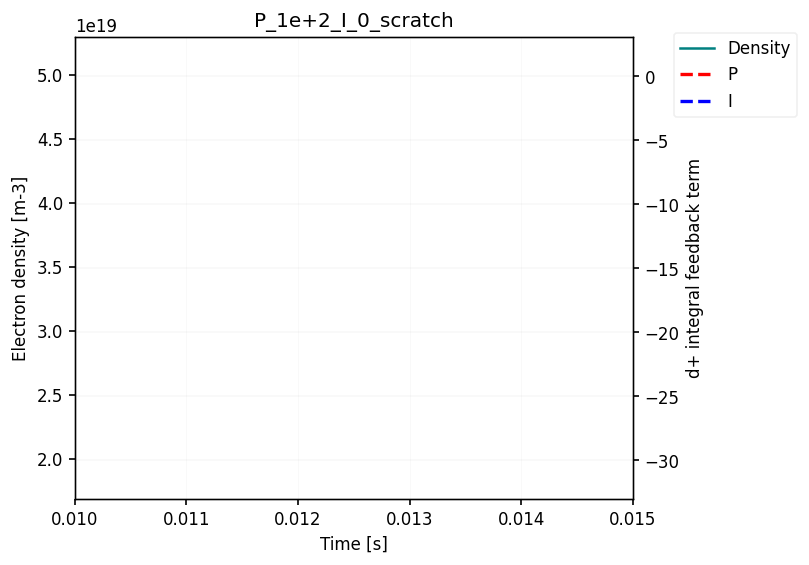

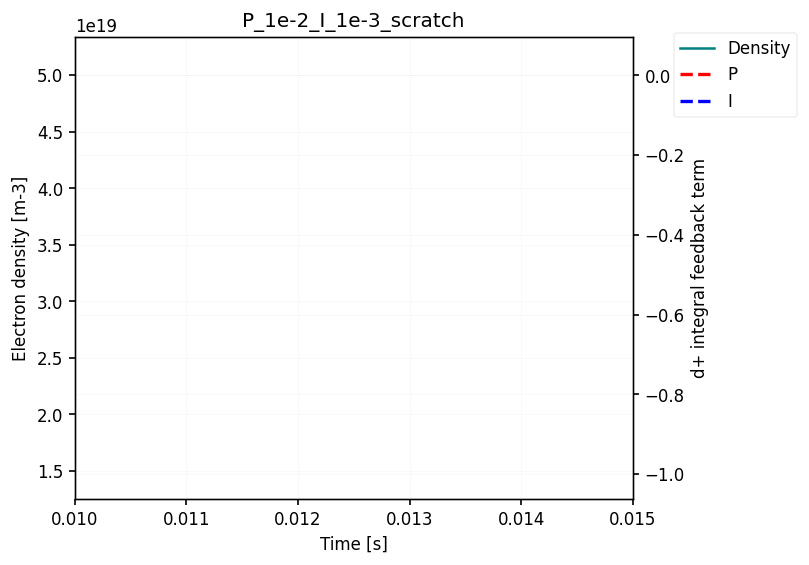

In [18]:
plt.close("all")
for case in casestore:

    ds = casestore[case].ds.isel(pos=slice(2,-2))
    # ds.isel(t=-1)["Ne"].plot()

    fig, ax = plt.subplots()


    (ds["Ne"]).isel(pos=0).plot(ax = ax, label = "Density")
    # ax.plot(ds["t"], np.ones_like(ds["t"])*2.7e19, c = "k", ls = "--")

    ax2 = ax.twinx()
    alpha = 1
    lw = 2
    ls = "--"
    ds["density_feedback_src_p_d+"].plot(ax = ax2, c = "red", ls = ls, lw = lw, alpha = alpha, label = "P")
    # ds["Sd+_feedback"].isel(pos=0).plot(ax = ax2, c = "red", ls = ls, lw = lw, alpha = alpha)
    ds["density_feedback_src_i_d+"].plot(ax = ax2, c = "blue", ls = ls, lw = lw, alpha = alpha, label = "I")
    ax.set_title(case)
    ax2.set_title("")
    ax.set_xlim(0.01,0.015)
    fig.legend(bbox_to_anchor=(1.14,0.9))
    # ax2.set_yscale("symlog", linthresh = 0.001)